In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [53]:
df = pd.read_csv('../bench_20230920_112700.txt')

In [54]:
df.head()

,tol,OriginalSizeInByte,CompressedSizeInByte,CompRatio,avg_load_time,std_dev_load_time,load_throughput,avg_comp_time,std_dev_comp_time,comp_throughput,avg_decomp_time,std_dev_decomp_time,decomp_throughput,devName
0,0.00001,1048576,1092823,0.959511,0.009225,0.0,1.136710e+08,0.047117,0.005417,2.225458e+07,0.076628,0.003130,1.368397e+07,gpu
1,0.00001,2097152,1995871,1.050745,0.009337,0.0,2.245964e+08,0.046323,0.002316,4.527192e+07,0.066943,0.002487,3.132746e+07,gpu
2,0.00001,4194304,2949559,1.422011,0.016567,0.0,2.531687e+08,0.048119,0.002807,8.716569e+07,0.069146,0.001938,6.065874e+07,gpu
3,0.00001,8388608,4882711,1.718023,0.022575,0.0,3.715900e+08,0.060730,0.001398,1.381289e+08,0.078365,0.003156,1.070450e+08,gpu
4,0.00001,16777216,9677275,1.733672,0.036947,0.0,4.540886e+08,0.088085,0.003117,1.904663e+08,0.088449,0.003744,1.896825e+08,gpu


In [55]:
df["comp_bw"] = df["comp_throughput"]/1024/1024
df["decomp_bw"] = df["decomp_throughput"]/1024/1024

In [56]:
df["comp_bw"]

0       21.223621
1       43.174669
2       83.127678
3      131.729964
4      181.642863
          ...    
173      3.998001
174      5.951197
175      8.289151
176      9.443538
177     10.774089
Name: comp_bw, Length: 178, dtype: float64

In [57]:
df_gpu = df[df["devName"]=="gpu"]

In [58]:
df_gpu["OriginalMB"] = df_gpu["OriginalSizeInByte"]/1024/1024
df_gpu["CompressedMB"] = df_gpu["CompressedSizeInByte"]/1024/1024

/tmp/ipykernel_282575/254387590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpu["OriginalMB"] = df_gpu["OriginalSizeInByte"]/1024/1024
/tmp/ipykernel_282575/254387590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpu["CompressedMB"] = df_gpu["CompressedSizeInByte"]/1024/1024


In [59]:
df.describe()

,tol,OriginalSizeInByte,CompressedSizeInByte,CompRatio,avg_load_time,std_dev_load_time,load_throughput,avg_comp_time,std_dev_comp_time,comp_throughput,avg_decomp_time,std_dev_decomp_time,decomp_throughput,comp_bw,decomp_bw
count,178.000000,1.780000e+02,1.780000e+02,178.000000,178.000000,178.0,1.780000e+02,178.000000,178.000000,1.780000e+02,178.000000,178.000000,1.780000e+02,178.000000,178.000000
mean,0.125375,6.302884e+08,9.739446e+07,12.968363,0.668138,0.0,5.912591e+08,2.057136,0.087016,2.352614e+08,1.265360,0.042945,3.516493e+08,224.362794,335.358875
std,0.277530,1.186379e+09,2.988481e+08,10.040440,1.105712,0.0,3.111396e+08,3.729757,0.217322,1.439457e+08,2.623237,0.074943,2.568776e+08,137.277291,244.977587
min,0.000010,1.048576e+06,1.001350e+05,0.959511,0.008347,0.0,3.096821e+06,0.046323,0.000623,1.345358e+06,0.050435,0.000188,3.319634e+06,1.283033,3.165850
25%,0.000100,8.388608e+06,8.842360e+05,3.532274,0.037000,0.0,3.678556e+08,0.088612,0.003416,8.267967e+07,0.078805,0.002275,6.793328e+07,78.849478,64.786223
50%,0.010000,6.710886e+07,6.043647e+06,10.292791,0.213668,0.0,5.963049e+08,0.251584,0.010972,2.887079e+08,0.259363,0.009374,3.631397e+08,275.333265,346.317028
75%,0.050000,5.368709e+08,4.973120e+07,21.576331,0.645766,0.0,8.349872e+08,2.504463,0.067612,3.707086e+08,0.924452,0.038168,6.219496e+08,353.535224,593.137354
max,1.000000,4.294967e+09,2.820326e+09,31.477848,5.013017,0.0,1.129422e+09,23.760710,2.376595,4.063694e+08,24.834704,0.289829,7.182115e+08,387.544087,684.939827


In [60]:
df_gpu.drop(["decomp_throughput","comp_throughput"],axis=1)

,tol,OriginalSizeInByte,CompressedSizeInByte,CompRatio,avg_load_time,std_dev_load_time,load_throughput,avg_comp_time,std_dev_comp_time,avg_decomp_time,std_dev_decomp_time,devName,comp_bw,decomp_bw,OriginalMB,CompressedMB
0,0.00001,1048576,1092823,0.959511,0.009225,0.0,1.136710e+08,0.047117,0.005417,0.076628,0.003130,gpu,21.223621,13.050052,1.0,1.042197
1,0.00001,2097152,1995871,1.050745,0.009337,0.0,2.245964e+08,0.046323,0.002316,0.066943,0.002487,gpu,43.174669,29.876194,2.0,1.903411
2,0.00001,4194304,2949559,1.422011,0.016567,0.0,2.531687e+08,0.048119,0.002807,0.069146,0.001938,gpu,83.127678,57.848679,4.0,2.812919
3,0.00001,8388608,4882711,1.718023,0.022575,0.0,3.715900e+08,0.060730,0.001398,0.078365,0.003156,gpu,131.729964,102.086070,8.0,4.656516
4,0.00001,16777216,9677275,1.733672,0.036947,0.0,4.540886e+08,0.088085,0.003117,0.088449,0.003744,gpu,181.642863,180.895365,16.0,9.228969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1.00000,268435456,8593779,31.236020,0.368494,0.0,7.284672e+08,0.745824,0.036442,0.451858,0.006987,gpu,343.244656,566.549912,256.0,8.195666
165,1.00000,536870912,17055515,31.477848,0.638340,0.0,8.410429e+08,1.405828,0.036604,0.833751,0.023206,gpu,364.198119,614.092361,512.0,16.265407
166,1.00000,1073741824,34231291,31.367261,1.170434,0.0,9.173878e+08,2.808277,0.073226,1.598292,0.036680,gpu,364.636440,640.683821,1024.0,32.645503
167,1.00000,2147483648,68238195,31.470405,2.101585,0.0,1.021840e+09,5.453679,0.110285,3.187187,0.064291,gpu,375.526330,642.572943,2048.0,65.077014


In [380]:
data = df_gpu[["tol","OriginalMB","CompressedMB","CompRatio"]]

In [381]:
data

,tol,OriginalMB,CompressedMB,CompRatio
0,0.00001,1.0,1.042197,0.959511
1,0.00001,2.0,1.903411,1.050745
2,0.00001,4.0,2.812919,1.422011
3,0.00001,8.0,4.656516,1.718023
4,0.00001,16.0,9.228969,1.733672
...,...,...,...,...
164,1.00000,256.0,8.195666,31.236020
165,1.00000,512.0,16.265407,31.477848
166,1.00000,1024.0,32.645503,31.367261
167,1.00000,2048.0,65.077014,31.470405


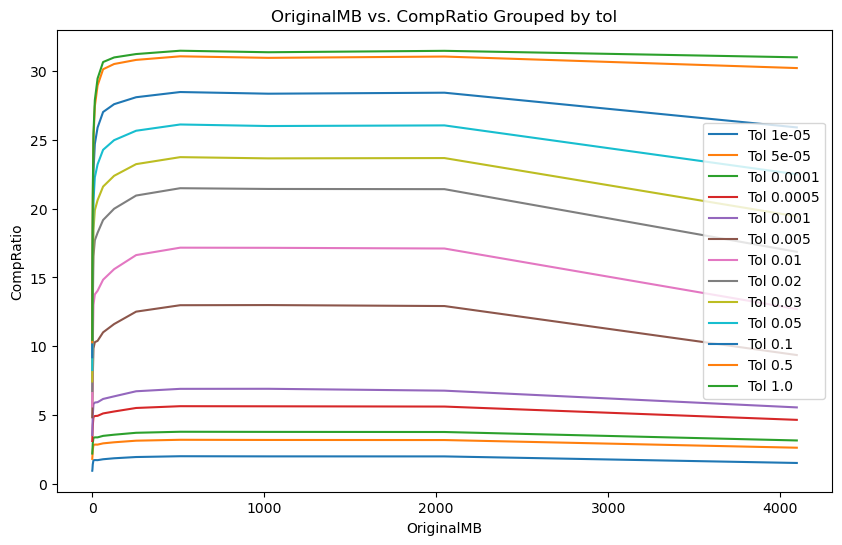

In [382]:

# Group the data by 'tol'
grouped_data = data.groupby('tol')

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriginalMB'], group['CompRatio'], label=f'Tol {tol}')

# Add labels and a legend
ax.set_xlabel('OriginalMB')
ax.set_ylabel('CompRatio')
ax.set_title('OriginalMB vs. CompRatio Grouped by tol')
ax.legend()

# Show the plot
plt.show()

In [390]:
# Group the data by 'tol'
grouped_data = data.groupby('tol')
CompRatio = grouped_data.agg({"CompRatio":"mean"})

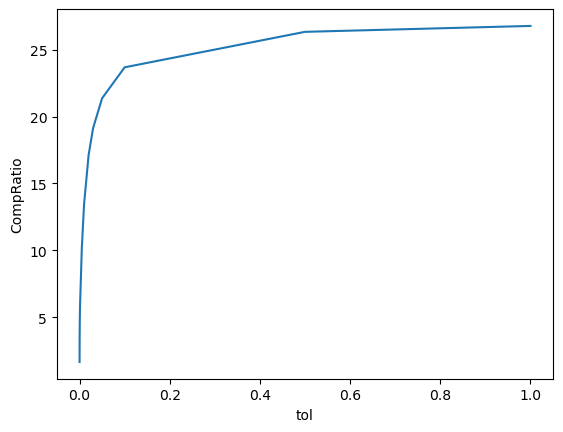

In [392]:
plt.plot(CompRatio.index,CompRatio["CompRatio"])
plt.xlabel("tol")
plt.ylabel("CompRatio")
plt.show()

In [400]:
def comp_ratio(tol):
    return np.interp(tol,CompRatio.index,CompRatio["CompRatio"])

test = comp_ratio(0.00001)
print(test)

1.673870109822227


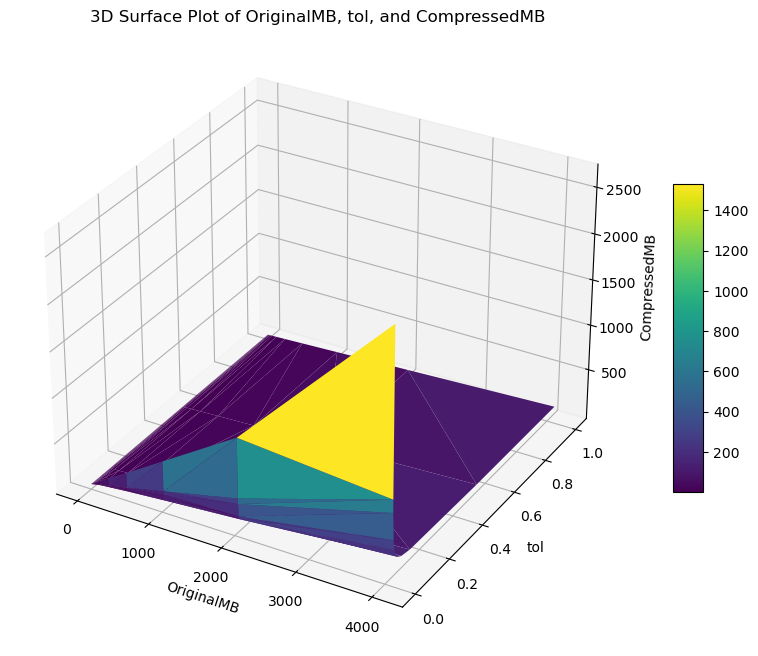

In [383]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you already have the 'data' DataFrame defined

# Create a 3D figure and axis for plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the x, y, and z values from the DataFrame
x = data['OriginalMB']
y = data['tol']
z = data['CompressedMB']

# Create the 3D surface plot
surf = ax.plot_trisurf(x, y, z, cmap='viridis')

# Add labels and a color bar
ax.set_xlabel('OriginalMB')
ax.set_ylabel('tol')
ax.set_zlabel('CompressedMB')
ax.set_title('3D Surface Plot of OriginalMB, tol, and CompressedMB')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Show the plot
plt.show()


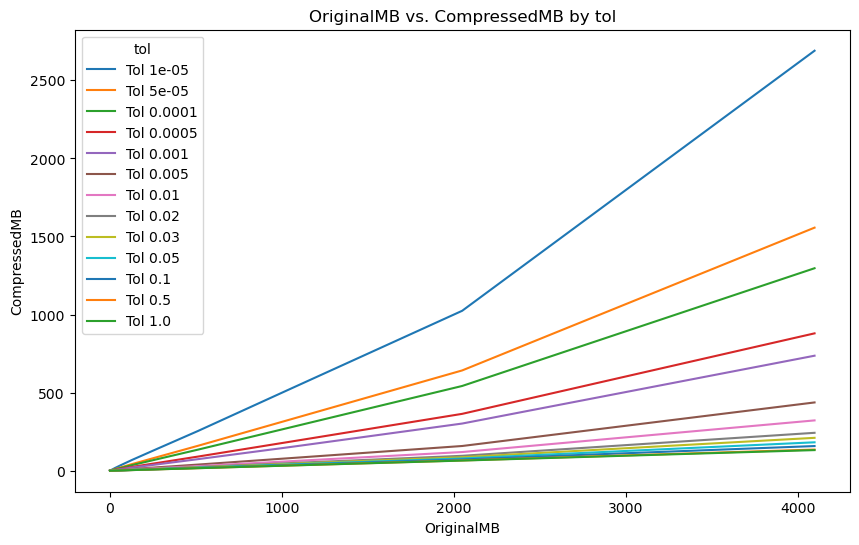

In [384]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have the 'data' DataFrame defined

# Group the data by 'tol'
grouped_data = data.groupby('tol')

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriginalMB'], group['CompressedMB'], label=f'Tol {tol}')

# Add labels and a legend
ax.set_xlabel('OriginalMB')
ax.set_ylabel('CompressedMB')
ax.set_title('OriginalMB vs. CompressedMB by tol')
ax.legend(title='tol')

# Show the plot
plt.show()


In [371]:
# interpolate Compresseddatasize(tol,OriginalMB)
import numpy as np
from scipy.interpolate import griddata

# Your input data
x = df_gpu["tol"]
y = df_gpu["OriginalMB"]
z = df_gpu["CompressedMB"]

# Define the grid points at which you want to interpolate
x_interpolate = [0.0001] # tol
y_interpolate = [2048] # OriginalMB
xx, yy = np.meshgrid(x_interpolate, y_interpolate)

# Perform two-dimensional interpolation
zz = griddata((x, y), z, (xx, yy), method='linear')

In [372]:
print(zz)

[[903.10481579]]


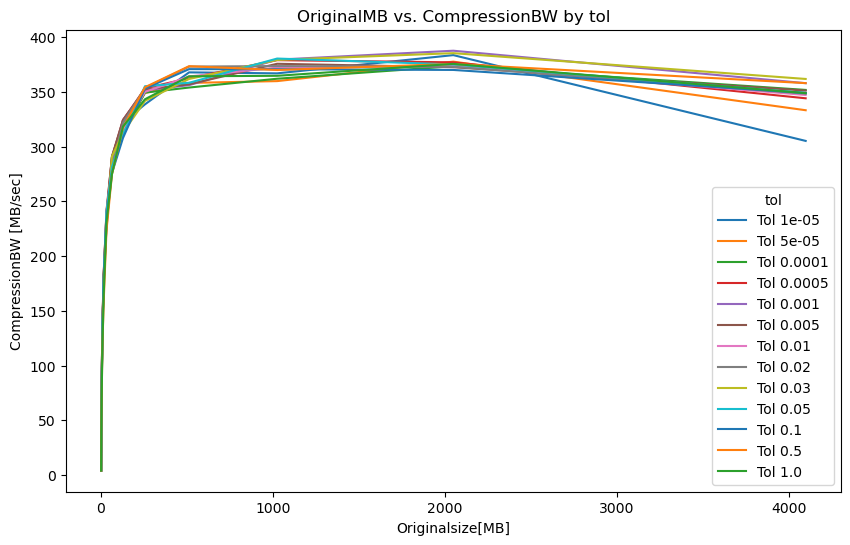

In [78]:
# Group the data by 'tol'
grouped_data = data.groupby('tol')

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriginalMB'], group['comp_bw'], label=f'Tol {tol}')

# Add labels and a legend
ax.set_xlabel('Originalsize[MB]')
ax.set_ylabel('CompressionBW [MB/sec]')
ax.set_title('OriginalMB vs. CompressionBW by tol')
ax.legend(title='tol')

# Show the plot
plt.show()

In [255]:
tip_point = 256
small_data = data[data["OriginalMB"] <=tip_point]


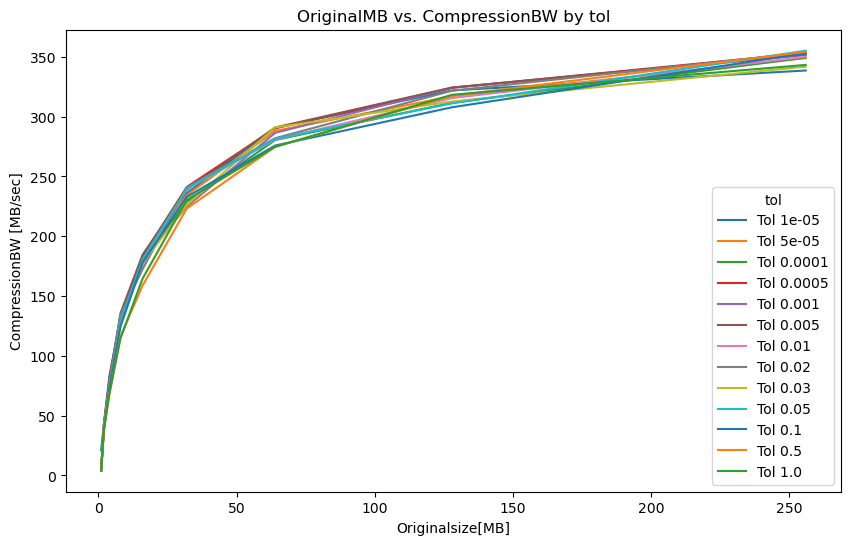

In [256]:
# Group the data by 'tol'
grouped_data = small_data.groupby('tol')

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriginalMB'], group['comp_bw'], label=f'Tol {tol}')

# Add labels and a legend
ax.set_xlabel('Originalsize[MB]')
ax.set_ylabel('CompressionBW [MB/sec]')
ax.set_title('OriginalMB vs. CompressionBW by tol')
ax.legend(title='tol')

# Show the plot
plt.show()

In [257]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data'
x = small_data['OriginalMB']
y = small_data['comp_bw']


In [258]:
mt = np.polynomial.polynomial.polyfit(x, y, 3)
prod_y = np.polynomial.polynomial.polyval(x, mt)


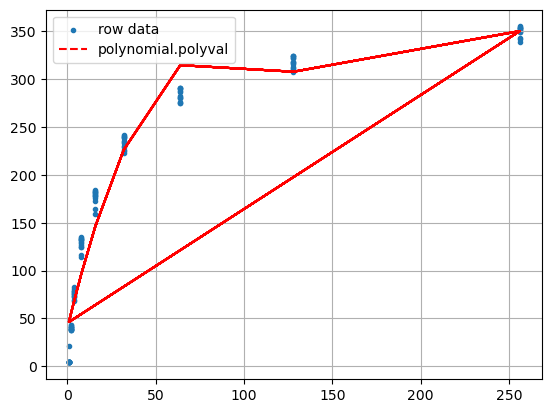

In [259]:
# グラフプロット
plt.scatter(x, y,marker='.', label='row data')
plt.plot(x, np.polynomial.polynomial.polyval(x, mt), linestyle="--", label='polynomial.polyval',color="red")
plt.grid()
plt.legend()
plt.show()

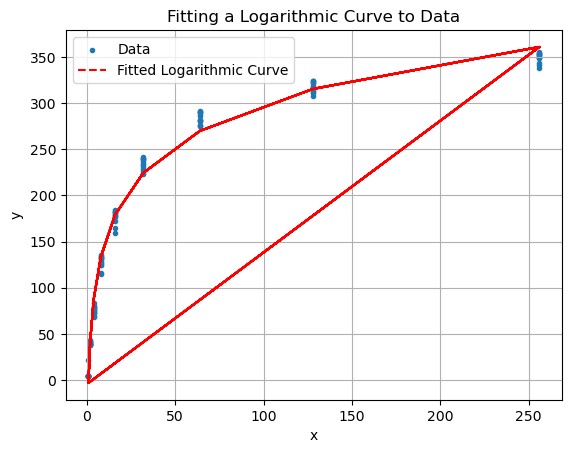

In [261]:
from scipy.optimize import curve_fit

def logarithmic_func(x, a, b):
    return a * np.log(x) + b


# Fit the data to the logarithmic function
params, covariance = curve_fit(logarithmic_func, x, y)

# Extract the optimized parameters
a, b = params

# Generate fitted values based on the optimized parameters
y_fit = logarithmic_func(x, a, b)

# Plot the original data and the fitted curve
plt.scatter(x, y, marker='.', label='Data')
plt.plot(x, y_fit, linestyle="--", label='Fitted Logarithmic Curve', color="red")

plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting a Logarithmic Curve to Data')
plt.show()


In [262]:
print(a,b)

65.6673170095711 -3.1578364172718127


/tmp/ipykernel_282575/2440703668.py:2: RuntimeWarning: divide by zero encountered in log
  return 65.66*np.log(x) - 3.157


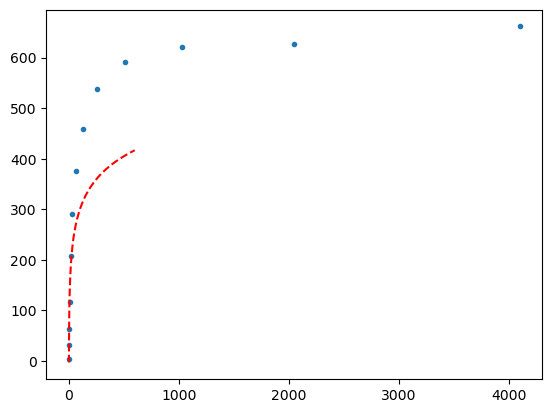

In [336]:
def fitfunc(x):
    return 65.66*np.log(x) - 3.157

xx = [val for val in range(0,600,1)]
plt.plot(xx,fitfunc(xx), linestyle="--", label='polynomial.polyval',color="red")
plt.scatter(x, y,marker='.', label='row data')
plt.show()
tipy = (fitfunc(tip_point))

In [337]:
def Comp_Bw(x):
    if isinstance(x, list):
        # Handle a list of values
        result = []
        for value in x:
            if value < tip_point:
                result.append(fitfunc(value))
            else:
                result.append(tipy)
        return result
    elif isinstance(x, int) or isinstance(x, float):
        # Handle a single value
        if x < tip_point:
            return fitfunc(x)
        else:
            return 348
    else:
        raise ValueError("Input must be an int, float, or a list of int/float values")




/tmp/ipykernel_282575/2944555041.py:2: RuntimeWarning: divide by zero encountered in log
  return a*np.log(x) + b


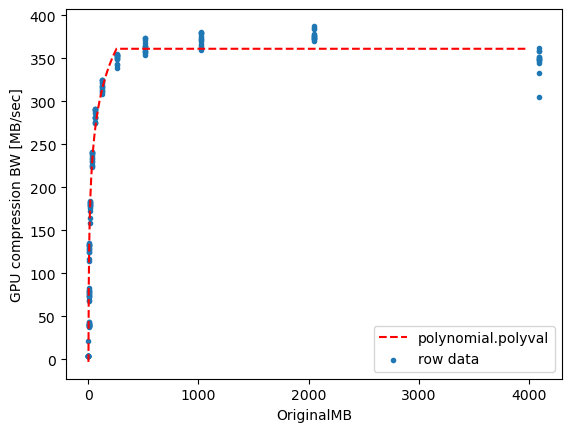

348


In [278]:
xx = [val for val in range(0,4000,1)]
plt.plot(xx,fitfunc2(xx), linestyle="--", label='polynomial.polyval',color="red")
plt.scatter(data["OriginalMB"],data["comp_bw"] ,marker='.', label='row data')
plt.xlabel("OriginalMB")
plt.ylabel("GPU compression BW [MB/sec]")
plt.legend()
plt.show()
print(fitfunc2(tip_point))

In [350]:
# こっちもinterpolarationをした方がいい気がしてきた
grouped_data = data.groupby("OriginalMB")
comp_mean = grouped_data.agg({'comp_bw':'mean'})
observed_comp_bw = comp_mean
observed_Ori_mb = comp_mean.index
comp_mean

,comp_bw
OriginalMB,
1.0,5.350783
2.0,40.004193
4.0,75.615681
8.0,128.052527
16.0,176.872204
32.0,233.551773
64.0,283.649310
128.0,317.520523
256.0,349.578643


In [356]:
import numpy as np
def gpu_comp_bw(orisize):
    return np.interp(orisize, comp_mean.index, comp_mean["comp_bw"])

test = gpu_comp_bw(100)
print(test)

302.7018673026983


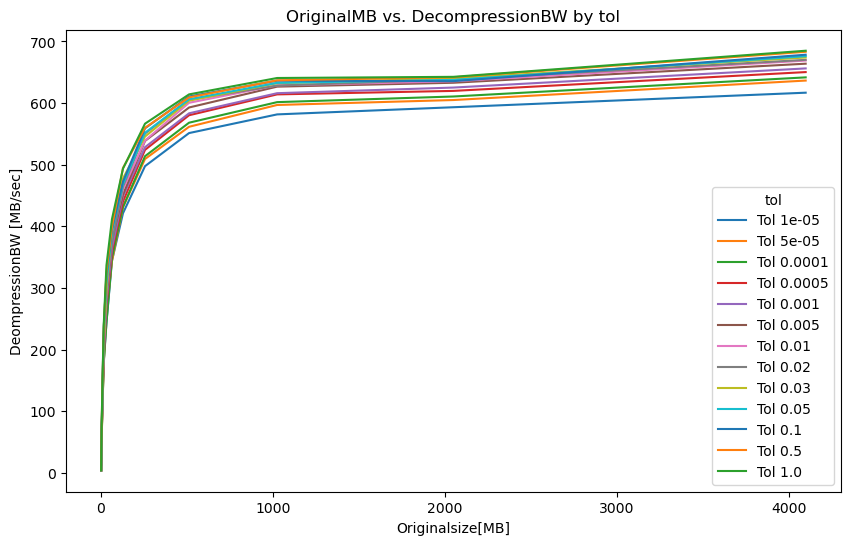

In [309]:
# Group the data by 'tol'
grouped_data = data.groupby('tol')

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriginalMB'], group['decomp_bw'], label=f'Tol {tol}')

# Add labels and a legend
ax.set_xlabel('Originalsize[MB]')
ax.set_ylabel('DeompressionBW [MB/sec]')
ax.set_title('OriginalMB vs. DecompressionBW by tol')
ax.legend(title='tol')

# Show the plot
plt.show()

In [310]:
grouped_data = data.groupby("OriginalMB")
decomp_mean = grouped_data.agg({'decomp_bw':'mean'})


In [318]:
decomp_mean.keys

<bound method NDFrame.keys of              decomp_bw
OriginalMB            
1.0           4.600713
2.0          30.483830
4.0          62.523177
8.0         117.006392
16.0        206.736137
32.0        291.065755
64.0        375.954412
128.0       458.137501
256.0       537.236779
512.0       591.341007
1024.0      621.005932
2048.0      627.537922
4096.0      661.626891>

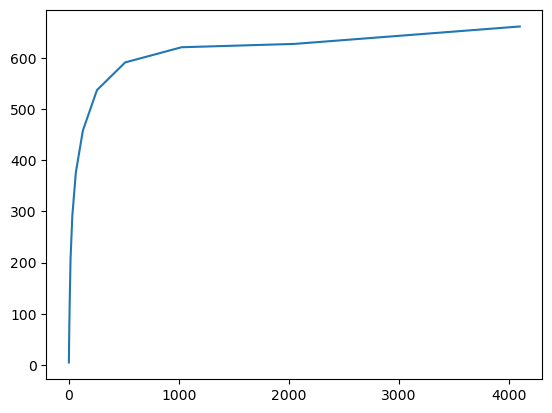

In [320]:
plt.plot(decomp_mean.index, decomp_mean)
plt.show()

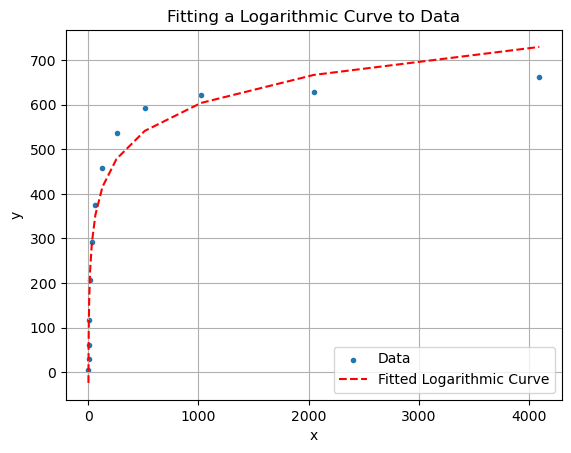

In [322]:
from scipy.optimize import curve_fit
x = decomp_mean.index
y = decomp_mean["decomp_bw"]

def logarithmic_func(x, a, b):
    return a * np.log(x) + b


# Fit the data to the logarithmic function
params, covariance = curve_fit(logarithmic_func, x, y)

# Extract the optimized parameters
a, b = params

# Generate fitted values based on the optimized parameters
y_fit = logarithmic_func(x, a, b)

# Plot the original data and the fitted curve
plt.scatter(x, y, marker='.', label='Data')
plt.plot(x, y_fit, linestyle="--", label='Fitted Logarithmic Curve', color="red")

plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting a Logarithmic Curve to Data')
plt.show()


In [323]:
print(a,b)

90.46518747882837 -23.52210459824288


/tmp/ipykernel_282575/2944555041.py:2: RuntimeWarning: divide by zero encountered in log
  return a*np.log(x) + b


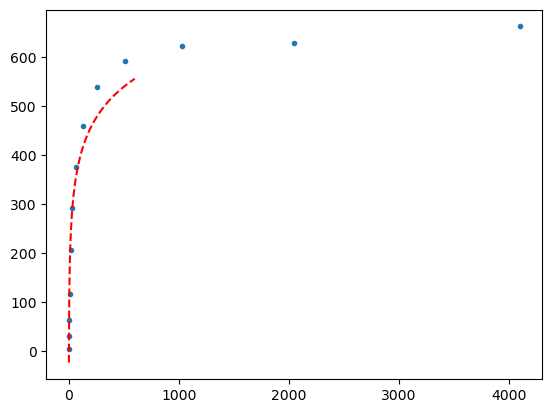

In [324]:
def fitfunc(x):
    return a*np.log(x) + b

xx = [val for val in range(0,600,1)]
plt.plot(xx,fitfunc(xx), linestyle="--", label='polynomial.polyval',color="red")
plt.scatter(x, y,marker='.', label='row data')
plt.show()
tipy = (fitfunc(tip_point))

In [333]:
# もしくは、linear interpolarationを施す
observed_x = x
observed_y = y
import numpy as np
x_interpolate = [1, 10,100,200,300,400,500,1300,3000]
y_interpolate = np.interp(x_interpolate,observed_x,observed_y)

In [334]:
y_interpolate

array([  4.6007132 , 139.43882817, 422.1823993 , 502.6308448 ,
       546.53594338, 567.67040747, 588.80487156, 622.76650765,
       643.38396608])

In [417]:
def gpu_decomp_bw(orisize):
    return np.interp(orisize,observed_x,observed_y)
test = gpu_decomp_bw(1000)
print(test)

619.6153890454634


In [401]:
# チューことで、Latencyのグラフが作れるようになったわけです。
nvmeBw = 2000000 # MB
NetBw = 125 # MB

def Latency(tol,OriSize):
    return OriSize/nvmeBw + OriSize/gpu_comp_bw(OriSize) + OriSize/comp_ratio(tol)/NetBw + OriSize/gpu_decomp_bw(OriSize)

In [415]:
import pandas as pd

# Initialize an empty DataFrame
Latency_df = pd.DataFrame(columns=['tol', 'OriSizeMB', 'l'])

# Create a list to store dictionaries for each row
data = []

# Loop through the desired range of 'tol' and 'OriSize'
for tol in range(0, 100000, 10):  # Adjust the range as needed
    if tol == 0:
        continue
    for OriSize in range(0, 4000, 100):
        if OriSize == 0:
            continue
        l = Latency(tol * 0.00001, OriSize)  # Convert 'tol' to float
        # Create a dictionary for the current row
        row_dict = {'tol': tol * 0.00001, 'OriSize': OriSize, 'l': l}
        # Append the dictionary to the list
        data.append(row_dict)

# Convert the list of dictionaries into a DataFrame
Latency_df = pd.DataFrame(data)

# Display the resulting DataFrame
print(Latency_df)


           tol  OriSize          l
0       0.0001      100   0.809156
1       0.0001      200   1.477805
2       0.0001      300   2.127211
3       0.0001      400   2.792192
4       0.0001      500   3.438188
...        ...      ...        ...
389956  0.9999     3500  16.267162
389957  0.9999     3600  16.760256
389958  0.9999     3700  17.255364
389959  0.9999     3800  17.752524
389960  0.9999     3900  18.251777

[389961 rows x 3 columns]


In [416]:
Latency_df.to_csv("../Latency_vs_tol_and_orisize.csv",index=False)